# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Loding Data

In [2]:
data = pd.read_csv("Marketing-Customer-Value-Analysis.csv")
data.head()    # # Print the first 10 lines 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.Response = data.Response.apply(lambda X : 0 if X == 'No' else 1)

In [4]:
data.head(2)   # Print the first 10 lines 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [5]:
data.tail(2)   # Print the last 10 lines 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9132,UP19263,California,7524.442436,0,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.2,Four-Door Car,Large
9133,Y167826,California,2611.836866,0,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.6,Two-Door Car,Medsize


# 3. Exploratory Data Analysis(EDA)

In [6]:
data.shape    # Print rows and columns

(9134, 24)

In [7]:
data.columns   # Print all columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
data.describe(include="all").T   # Describing a column from a DataFrame by accessing it as an attribute

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,EB66698,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134,NaN,NaN,NaN,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.4
Response,9134,NaN,NaN,NaN,0.143201,0.350297,0,0,0,0,1
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134,NaN,NaN,NaN,37657.4,30379.9,0,0,33889.5,62320,99981


In [9]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null int64
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9

# 4. Analytics on Engaged Customers

#### We are going to analyze it to understand how different customers behave and react to different marketing strategies.

## 4.1 -Overall Engagement Rate

#### The Response field contains information about whether a customer responded to the marketing efforts.

In [11]:
# Get the total number of customers who have responded

data.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

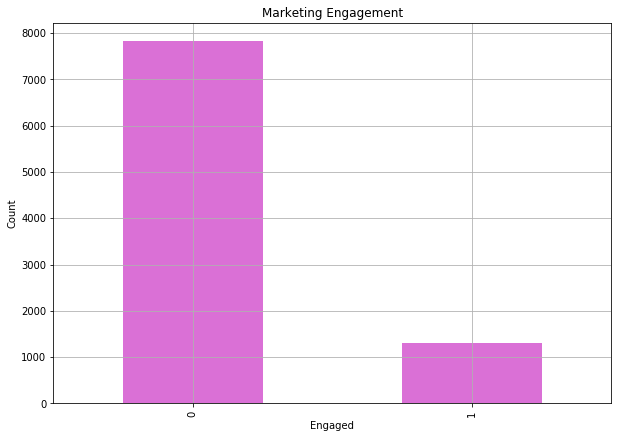

In [12]:
# Visualize this in a bar plot

ax = data.groupby('Response').count()['Customer'].plot(kind='bar',
                                                     color='orchid',
                                                     grid=True,
                                                     figsize=(10, 7),
                                                     title='Marketing Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [13]:
# Calculate the percentages of the engaged and non-engaged customers

data.groupby('Response').count()['Customer']/data.shape[0]

Response
0    0.856799
1    0.143201
Name: Customer, dtype: float64

From this output and from the plot, we can see that only about 14% of the customers responded
to the marketing calls

## 2.2 - Engagement Rates by Offer Type
The Renew Offer Type column in this DataFrame contains the type of the renewal offer presented
to the customers. We are going to look into what types of offers worked best for the engaged
customers

From this output and from the plot, we can see that only about 14% of the customers responded
to the marketing calls.

In [14]:
# Get the engagement rates per renewal offer type
by_offer_type_df = data.loc[
data['Response'] == 1 , # count only engaged customers
].groupby([
'Renew Offer Type'# engaged customers grouped by renewal offer type
]).count()['Customer'] / data.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

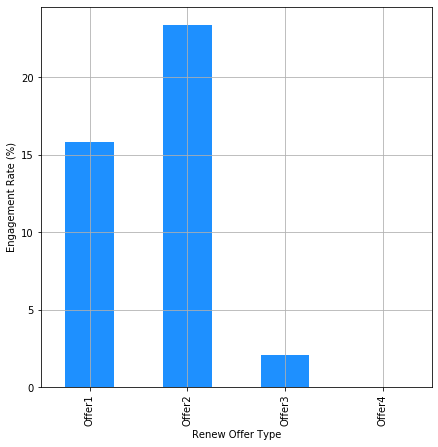

In [15]:
# Visualize it in a bar plot
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='dodgerblue',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

As we can see, Offer2 had the highest engagement rate among the customers


### 2.3 - Offer Type & Vehicle Class
We are going to understand how customers with different attributes respond differently to different marketing messages. We start looking at the engagements rates by each offer type and vehicle
class

In [16]:
 by_offer_type_df = data.loc[
data['Response'] == 1 # engaged customers
].groupby([
'Renew Offer Type', 'Vehicle Class' # grouping the data by these two columns
]).count()['Customer'] / data.groupby('Renew Offer Type').count()['Customer']# rates for each group
5
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [17]:
# Make the previous output more readable using unstack function
# to pivot the data and extract and transform the inner-level groups to columns
by_offer_type_df = by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


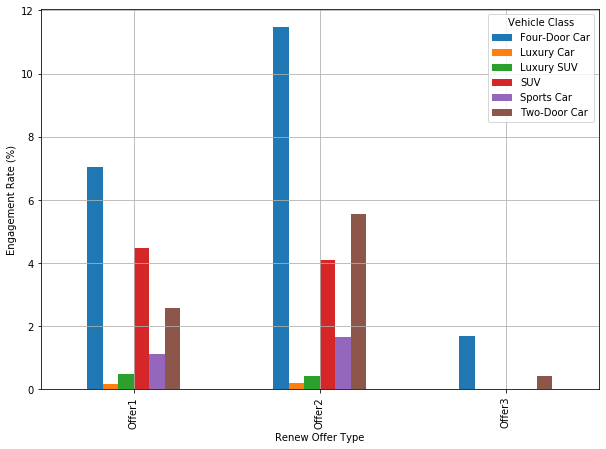

In [18]:
ax = (by_offer_type_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

We already knew from the previous section “Engagement Rates by Offer Type” that Offer2
had the highest response rate among customers. Now we can add more insights by having broken
down the customer attributes with the category “Vehicle class”: we can notice that customers with
Four-Door Car respond more frequently for all offer types and that those with “Luxury SUV”
respond with a higher chance to Offer1 than to Offer2.
#### If we have significantly difference in the response rates among different customer rates, we can fine-tune who to target for different set of offers.

### 2.4 - Engagement Rates by Sales Channel
We are going to analyze how engagement rates differ by different sales channels

In [19]:
by_sales_channel_df = data.loc[data['Response'] == 1].groupby(['Sales Channel']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

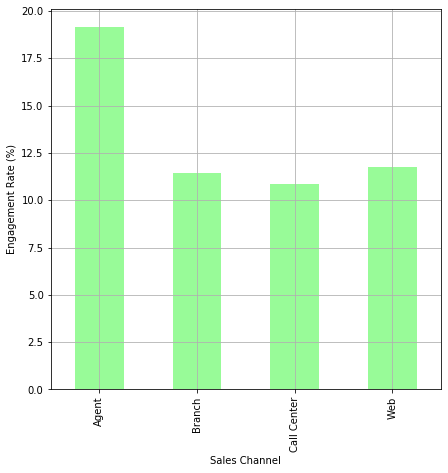

In [20]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='palegreen',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

As we can notice, Agent works better in term of getting responses from the customers, and
then sales through Web works the second best. Let’s go ahead in breaking down this result deeper
with different customers’ attributes.

## 2.5 - Sales Channel & Vehicle Size
We are going to see whether customers with various vehicle sizes respond differently to different
sales channels.

In [21]:
by_sales_channel_df = data.loc[
data['Response'] == 1
].groupby([
'Sales Channel', 'Vehicle Size'
]).count()['Customer'] / data.groupby('Sales Channel').count()['Customer']
by_sales_channel_df


Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [22]:
# Unstack the data into a more visible format
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df


Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


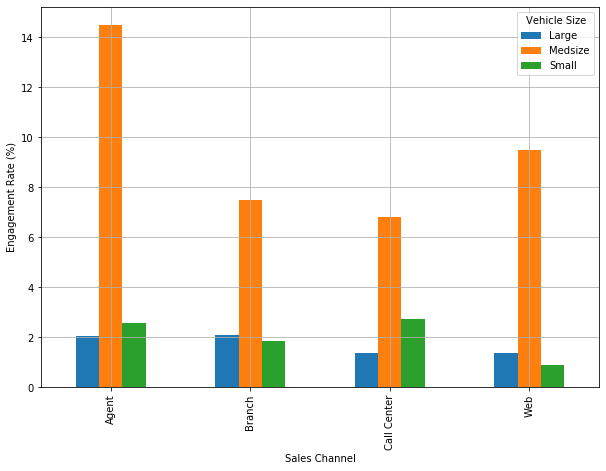

In [23]:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()


As we can see, customers with medium size vehicles respond the best to all sales channels
whereas the other customers differs slightly in terms of engagement rates across different sales
channels.

#### 2.6 - Engagement Rates by Months Since Policy Inception

In [24]:
by_months_since_inception_df = data.loc[
data['Response'] == 1 
].groupby(
by='Months Since Policy Inception'
)['Response'].count() / data.groupby(
by='Months Since Policy Inception'
)['Response'].count() * 100.0
10
by_months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

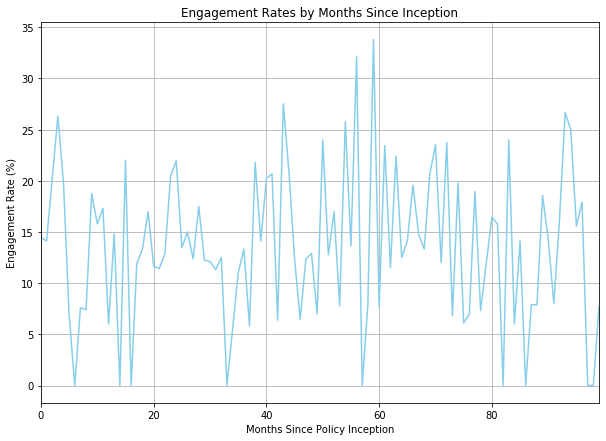

In [25]:
ax = by_months_since_inception_df.fillna(0).plot(
figsize=(10, 7),
title='Engagement Rates by Months Since Inception',
grid=True,
color='skyblue'
)
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')
plt.show()


#### 3 3. Customer Segmentation by CLV & Months Since Policy Inception

We are going to segment our customer base by Customer Lifetime Value and Months Since Policy
Inception.

In [26]:
#### Take a look at the distribution of the CLV
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

For the previous output, we are going to define those customers with a CLV higher than the
median as ### high-CLV customers, and those with a CLV lower than the median as ## low-CLV customers.

In [27]:
data['CLV Segment'] = data['Customer Lifetime Value'].apply(lambda x: 'High' if x > data['Customer Lifetime Value'].median() else 'Low')


In [28]:
# Do the same procedure for Months Since Policy Inception
data['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [29]:
data['Policy Age Segment'] = data['Months Since Policy Inception'].apply(lambda x: 'High' if x > data['Months Since Policy Inception'].median() else 'Low')


In [30]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


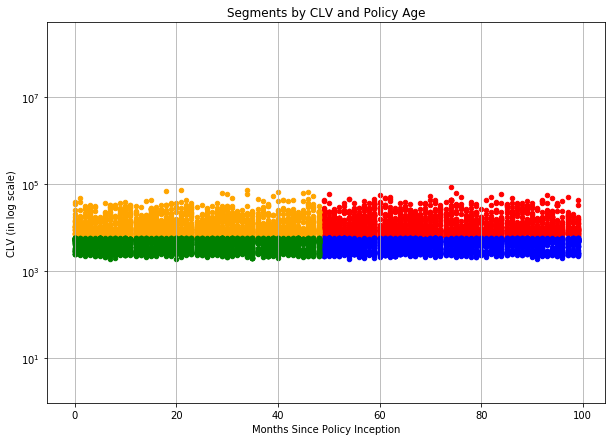

In [31]:
 # Visualize these segments
ax = data.loc[
(data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High')
].plot.scatter(
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='red'
)

data.loc[
(data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'High')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='blue'
)

data.loc[
(data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='orange'
   
)

data.loc[
(data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
    y='Customer Lifetime Value',
logy=True,
color='green',
grid=True,
figsize=(10, 7)
)
ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

logy=True transform the scale to log scale and it is often used for monetary values as they
often have high skewness in their values. We have repeated the code for the plot.scatter 4 times
because we have created 4 segments.

In [32]:
# See whether there is any noticeable difference in the engagement rates among these four segments
engagement_rates_by_segment_df = data.loc[
data['Response'] == 1
].groupby([
'CLV Segment', 'Policy Age Segment'
]). count()['Customer'] / data.groupby([
'CLV Segment', 'Policy Age Segment'
]).count()['Customer']
engagement_rates_by_segment_df


CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

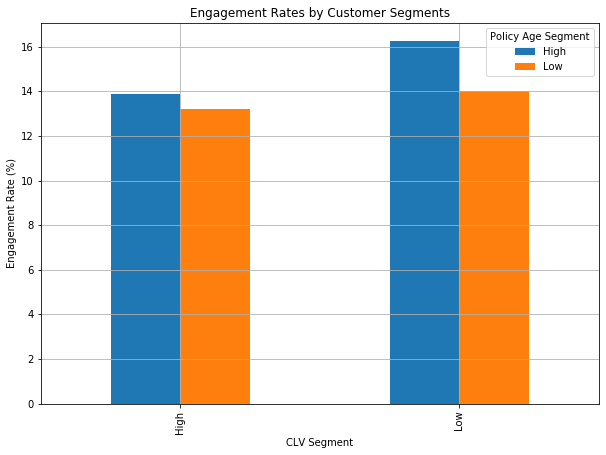

In [33]:
# Look at these differences in a chart
ax = (engagement_rates_by_segment_df.unstack()*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()


As we can notice, High Policy Age Segment has higher engagement than the Low Policy Age
Segment. This suggests that those customers who have been insured by this company longer respond better. Moreover, the High Policy Age and Low CLV segment has the highest engagement
rate among the four segments.
By creating different customer segments based on customer attributes, we can better understand how different groups of customers behave differently, and consequently, use this information to customize the marketing messagges.

# 4.2 Response Rate:

# 4.4 Response rate by Education

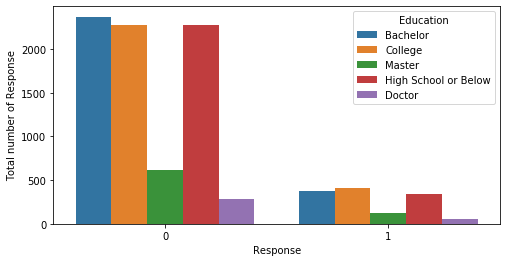

In [34]:
plt.figure(figsize=(8,4))    # Arrange figure size
ax = sns.countplot('Response',hue = 'Education' ,data = data)  # Show the counts of observations in each categorical bin using bars.
plt.ylabel('Total number of Response')   # Y-axis
plt.show()

Notice that customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

# 4.5 Response rate by Sales Channel

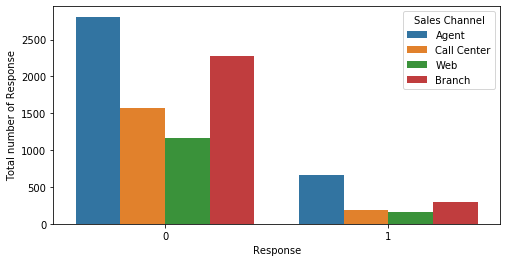

In [35]:
plt.figure(figsize=(8,4))   # Arrange figure size
ax = sns.countplot('Response',hue = 'Sales Channel' ,data = data) # Show the counts of observations in each categorical bin using bars.
plt.ylabel('Total number of Response')
plt.show()

# 4.6 Response rate by Total Claim Amount

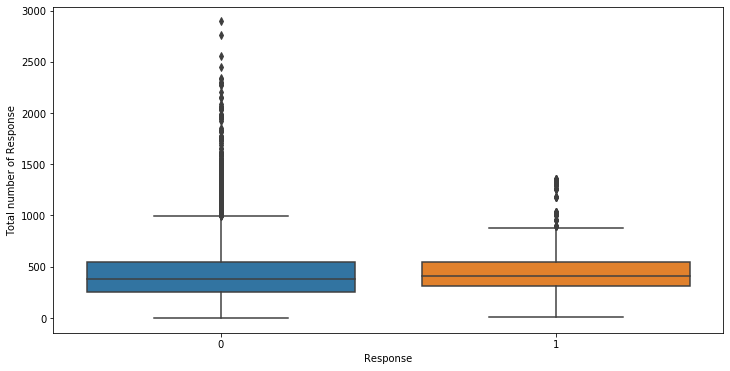

In [36]:
plt.figure(figsize=(12,6))   # Arrange figure size
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = data)  # Show box plot Total Claim Amount and Response.
plt.ylabel('Total number of Response')
plt.show()

Box plots are a great way to visualize the distribuation of countinous variables. They show the min, max, first quatile, meadian and third quartile, all in one view. The central rectangle spans from the first quartile to the third quartile, and the green line shows the median. The lower and upper ends show the minimum and the maximum of each distribution.

The dots above the upper boundry line show the suspected outliers that are decided based on the INterquartile range (IQR). The points that fall 1.5*IQR above the third quartile or 1.5*IQR below the quartile are suspected outliers and are drawn with the dots.

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

# 4.3 Response rate by renew offer

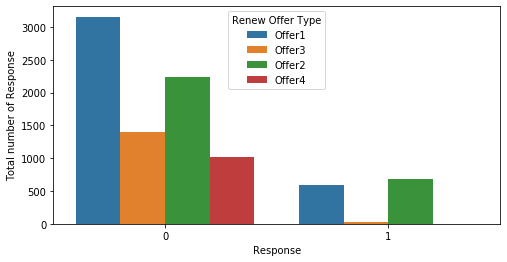

In [37]:
plt.figure(figsize=(8,4))   # Arrange figure size
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,data = data)  # Show the counts of observations in each categorical bin using bars.
plt.ylabel('Total number of Response')    # Y-axis
# annot_plot(ax, 0.08,1)
plt.show()

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

# 4.7 esponse rate by Income Distributions

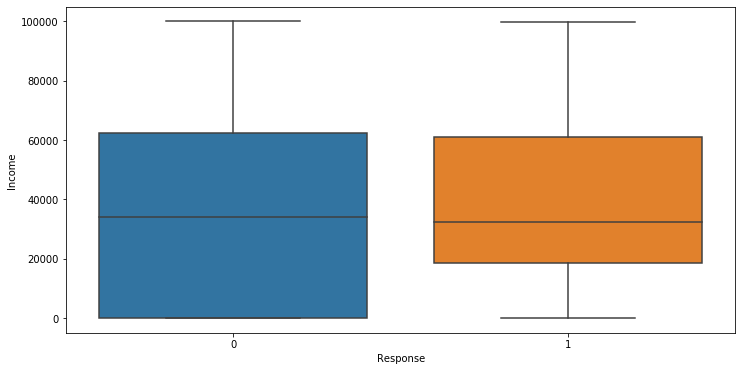

In [38]:
plt.figure(figsize=(12,6))  # Arrange figure size
sns.boxplot(y = 'Income' , x = 'Response', data = data)  # Show box plot Income and  Response.
plt.show()

# 4.8 Response rate by EmploymentStatus

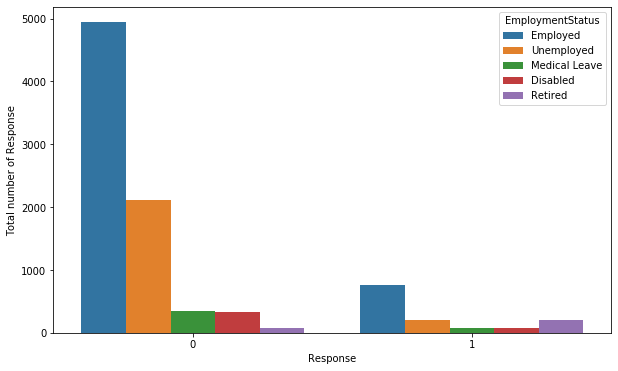

In [39]:
plt.figure(figsize=(10,6)) # Arrange figure size
ax = sns.countplot('Response',hue = 'EmploymentStatus' ,data = data) # Show box plot Response and EmploymentStatus.
plt.ylabel('Total number of Response')
# annot_plot(ax, 0.08,1)
plt.show()

# 4.9 Response rate by Vehicle Class

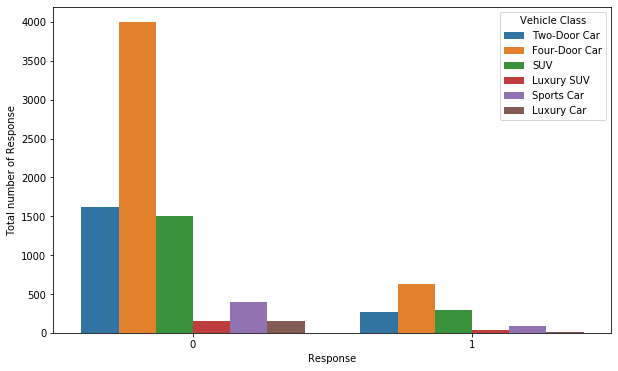

In [40]:
plt.figure(figsize=(10,6))  # Arrange figure size
ax = sns.countplot('Response',hue = 'Vehicle Class' ,data = data)  # Show box plot Response and Vehicle Class.
plt.ylabel('Total number of Response')
plt.show()

# 4.10 Response rate by Policy

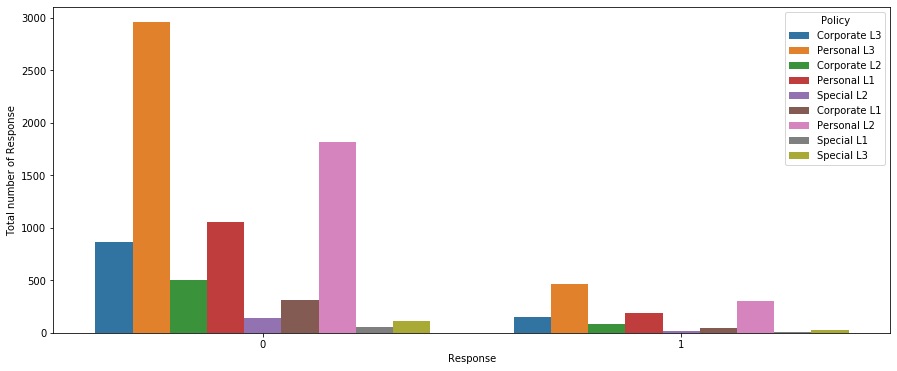

In [41]:
plt.figure(figsize=(15,6))
ax = sns.countplot('Response',hue = 'Policy' ,data = data)
plt.ylabel('Total number of Response')
plt.show()

# 5 Regression Analysis with Continuous Variables Only

In [42]:
import statsmodels.api as sm

In [43]:
continous_var_df = data.select_dtypes(include=['int64','float'])  # select all columns having float datatype 
continous_var_df.nunique()  # Return number of unique elements in the object.

Customer Lifetime Value          8041
Response                            2
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
dtype: int64

In [44]:
continous_var_df.columns  # Print columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [45]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()  # Print Summary

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                -0.02546
Time:                        08:36:23   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

By looking at the p-value of 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.

What Are P Values?

P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

#### High P values: your data are likely with a true null.

#### Low P values: your data are unlikely with a true null

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

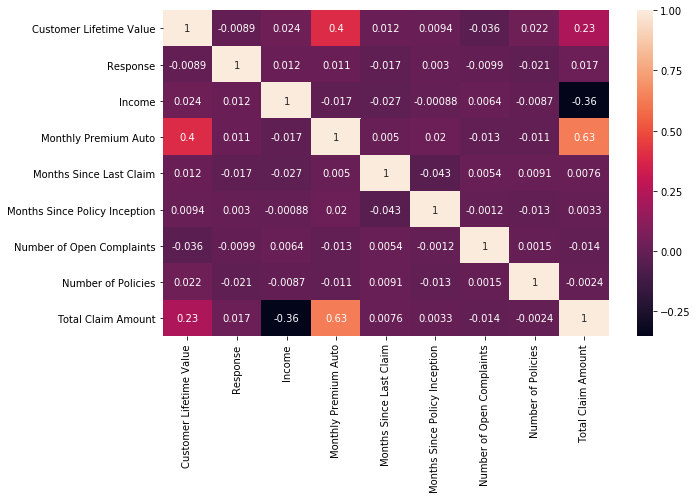

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

# 6 Regression Analysis with Categorical Variables

In [47]:
categorical_df = data.select_dtypes(include='object')   # select all columns having float datatype 
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)  # Drop the data

In [48]:
cat_df.nunique()   # Return number of unique elements in the object.

State                 5
Coverage              3
Education             5
EmploymentStatus      5
Gender                2
Location Code         3
Marital Status        3
Policy Type           3
Policy                9
Renew Offer Type      4
Sales Channel         4
Vehicle Class         6
Vehicle Size          3
CLV Segment           2
Policy Age Segment    2
dtype: int64

# Conversion of Categorical data

In [49]:
cat_df.columns   # Print columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'CLV Segment', 'Policy Age Segment'],
      dtype='object')

In [50]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size','CLV Segment','Policy Age Segment']  # Specify own columns name.

In [51]:
# cols

In [52]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [53]:
cat_df.head()  # Print first 5 line

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,4,0,0,1,0,1,1,0,2,0,0,5,1,1,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1,0,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1,0,0
4,4,0,0,1,1,0,2,1,3,0,0,0,1,1,1


In [54]:
categorical_train = sm.Logit(continous_var_df.Response, cat_df)  # Logit Model
categorical_train.fit().summary()   # Print Summary

Optimization terminated successfully.
         Current function value: 0.386976
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9119
Method:                           MLE   Df Model:                           14
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                 0.05784
Time:                        08:36:27   Log-Likelihood:                -3534.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 8.593e-84
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
State                 -0.0310      0.023     -1.350      0.177      -0.076       0.014
Coverage              -0.0327      0.047     -0.696      0.486      -0.125       0.059
Education              0.0077      0.022      0.359      0.720      -0.035       0.050
EmploymentStatus      -0.0511      0.024     -2.160      0.031      -0.098      -0.005
Gender                 0.0420      0.060      0.698      0.485      -0.076       0.160
Location Code         -0.0596      0.047     -1.260      0.208      -0.152       0.033
Marital Status        -0.4744      0.048     -9.961      0.000      -0.568      -0.381
Policy Type            0.1926      0.133      1.453      0.146      -0.067       0.452
Policy                -0.0856      0.037     -2.299      0.022      -0.159      -0.013
Renew Offer Type      -0.5806      0.038    -15.266      0.000      -0.655      -0.506
Sales Channel         -0.2186      0.030     -7.246      0.000      -0.278      -0.159
Vehicle Class          0.0220      0.014      1.515      0.130      -0.006       0.050
Vehicle Size          -0.3480      0.053     -6.595      0.000      -0.451      -0.245
CLV Segment            0.1971      0.062      3.195      0.001       0.076       0.318
Policy Age Segment    -0.0441      0.060     -0.729      0.466      -0.163       0.074
======================================================================================
"""

By looking at p-value,'Marital Status','Renew Offer type','Sales channel','Vehicle size','policy' variables are significant at 0.05 significance level, and all of them have negative relationship with the output variable, Response.

# 7 Regression Analysis with  Continous and Categorical Variables.

In [55]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)

In [56]:
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)   # COncat two data

In [57]:
all_data_df.info()  # Print first five line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null int64
Income                           9134 non-null int64
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Total Claim Amount               9134 non-null float64
State                            9134 non-null int32
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Gender                           9134 non-null int32
Location Code                    9134 non-null int32
Marital Status                   9134 non-null int32
Policy Type                      9134 non

In [58]:
total_train = sm.Logit(all_data_df.Response, all_data_df.drop(['Response'], axis = 1))   # Logit Model
total_train.fit().summary()   # Print Summary

Optimization terminated successfully.
         Current function value: 0.383908
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9111
Method:                           MLE   Df Model:                           22
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                 0.06531
Time:                        08:36:27   Log-Likelihood:                -3506.6
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 8.748e-90
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -2.809e-06   5.77e-06     -0.487      0.627   -1.41e-05    8.51e-06
Income                         3.778e-06   1.43e-06      2.634      0.008    9.66e-07    6.59e-06
Monthly Premium Auto             -0.0026      0.001     -1.888      0.059      -0.005     9.9e-05
Months Since Last Claim          -0.0051      0.003     -1.659      0.097      -0.011       0.001
Months Since Policy Inception    -0.0066      0.002     -3.640      0.000      -0.010      -0.003
Number of Open Complaints        -0.0556      0.035     -1.583      0.113      -0.124       0.013
Number of Policies               -0.0268      0.013     -2.012      0.044      -0.053      -0.001
Total Claim Amount                0.0007      0.000      4.222      0.000       0.000       0.001
State                            -0.0077      0.024     -0.328      0.743      -0.054       0.039
Coverage                         -0.0136      0.053     -0.255      0.799      -0.118       0.091
Education                         0.0265      0.022      1.200      0.230      -0.017       0.070
EmploymentStatus                 -0.0115      0.032     -0.362      0.718      -0.074       0.051
Gender                            0.0666      0.062      1.080      0.280      -0.054       0.188
Location Code                    -0.0823      0.054     -1.535      0.125      -0.187       0.023
Marital Status                   -0.4615      0.049     -9.430      0.000      -0.557      -0.366
Policy Type                       0.1019      0.135      0.754      0.451      -0.163       0.367
Policy                           -0.0285      0.039     -0.724      0.469      -0.106       0.049
Renew Offer Type                 -0.5825      0.039    -14.976      0.000      -0.659      -0.506
Sales Channel                    -0.1907      0.031     -6.220      0.000      -0.251      -0.131
Vehicle Class                     0.0290      0.015      1.920      0.055      -0.001       0.059
Vehicle Size                     -0.2767      0.056     -4.945      0.000      -0.386      -0.167
CLV Segment                       0.2280      0.077      2.952      0.003       0.077       0.379
Policy Age Segment               -0.3083      0.103     -2.992      0.003      -0.510      -0.106
=================================================================================================
"""

By looking at the p-value of 'Customer lifetime value','Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Policies','Total claim amount','Marital Status','Renew offer type','Sales Channel','Vehicle size', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.

### Conclusion: 
The higher the Customer Lifetime value is, the less likely that the customer will be response to marketing calls.

# 8 Regression Analysis with excluding Non-significant variables

In [59]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size',
       'CLV Segment', 'Policy Age Segment'],
      dtype='object')

In [60]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.385476
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Sat, 15 Feb 2020   Pseudo R-squ.:                 0.06149
Time:                        08:36:28   Log-Likelihood:                -3520.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 7.814e-93
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.129e-05   5.09e-06     -2.217      0.027   -2.13e-05   -1.31e-06
Income                         3.549e-06   1.11e-06      3.192      0.001    1.37e-06    5.73e-06
Monthly Premium Auto             -0.0033      0.001     -2.762      0.006      -0.006      -0.001
Months Since Last Claim          -0.0062      0.003     -2.102      0.036      -0.012      -0.000
Months Since Policy Inception    -0.0023      0.001     -2.238      0.025      -0.004      -0.000
Number of Policies               -0.0414      0.013     -3.226      0.001      -0.067      -0.016
Total Claim Amount                0.0006      0.000      4.148      0.000       0.000       0.001
Marital Status                   -0.4794      0.045    -10.664      0.000      -0.567      -0.391
Renew Offer Type                 -0.5793      0.038    -15.268      0.000      -0.654      -0.505
Sales Channel                    -0.1981      0.030     -6.539      0.000      -0.257      -0.139
Vehicle Size                     -0.3031      0.053     -5.690      0.000      -0.407      -0.199
=================================================================================================
"""

# 9 Classification:

In [61]:
y = all_data_df.Response
X = all_data_df.drop('Response', axis = 1)

In [62]:
from sklearn.model_selection import train_test_split, cross_validate

X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

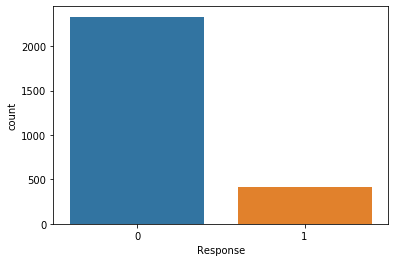

In [63]:
ax = sns.countplot(y_test)
# annot_plot_num(ax,0.08,1)

# 9.1 SVC Classification

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)

[[2332   41]
 [   0  368]]
accuracy_score: 0.9850419554906968
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2373
           1       0.90      1.00      0.95       368

    accuracy                           0.99      2741
   macro avg       0.95      0.99      0.97      2741
weighted avg       0.99      0.99      0.99      2741



# 9.2 RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier   # Import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train,cv = 5)


[[2326   25]
 [   6  384]]
Accuracy score: 0.9886902590295512
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2351
           1       0.94      0.98      0.96       390

    accuracy                           0.99      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.99      0.99      0.99      2741



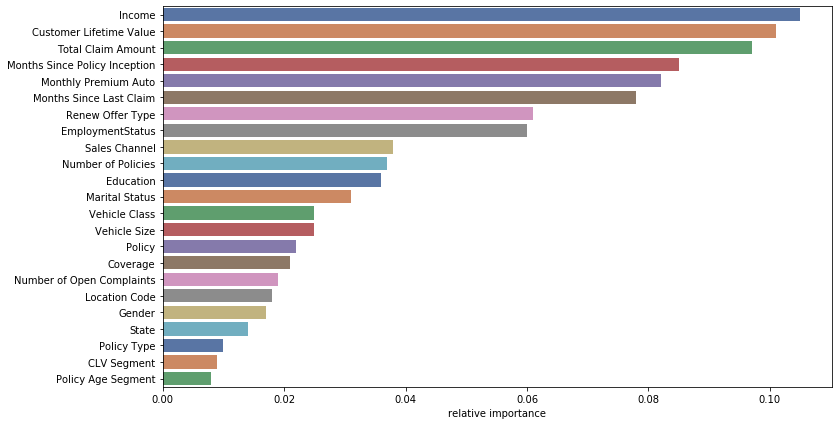

In [66]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()

# Good Job.